In [1]:
import os
from fastai.vision.all import *
from fastai.data.all import *
from fastai.vision.widgets import *


In [2]:
torch.cuda.set_device(6)

In [20]:
path = '/home/alao/ml/models_data/all_syn_n_heal'
len(os.listdir(path)), path

(2, '/home/alao/ml/models_data/all_syn_n_heal')

In [31]:
len(os.listdir(path+"/all_syn_sb"))

237520

In [21]:
fnames = get_image_files(path)
fnames

(#237982) [Path('/home/alao/ml/models_data/all_syn_n_heal/all_seg_healthy_sb/1.png'),Path('/home/alao/ml/models_data/all_syn_n_heal/all_seg_healthy_sb/10.png'),Path('/home/alao/ml/models_data/all_syn_n_heal/all_seg_healthy_sb/100.png'),Path('/home/alao/ml/models_data/all_syn_n_heal/all_seg_healthy_sb/101.png'),Path('/home/alao/ml/models_data/all_syn_n_heal/all_seg_healthy_sb/102.png'),Path('/home/alao/ml/models_data/all_syn_n_heal/all_seg_healthy_sb/103.png'),Path('/home/alao/ml/models_data/all_syn_n_heal/all_seg_healthy_sb/104.png'),Path('/home/alao/ml/models_data/all_syn_n_heal/all_seg_healthy_sb/105.png'),Path('/home/alao/ml/models_data/all_syn_n_heal/all_seg_healthy_sb/106.png'),Path('/home/alao/ml/models_data/all_syn_n_heal/all_seg_healthy_sb/107.png')...]

(256, 256)

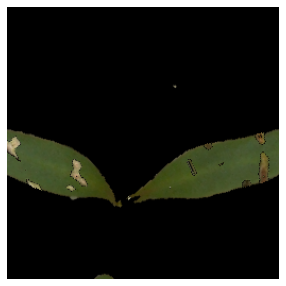

In [22]:
im = PILImage.create(fnames[800])
im.show()
im.size

# Build Datablocks and Train Model

In [23]:

plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
#     batch_tfms=aug_transforms()
)

In [24]:
dls = plants.dataloaders(path, bs=32)

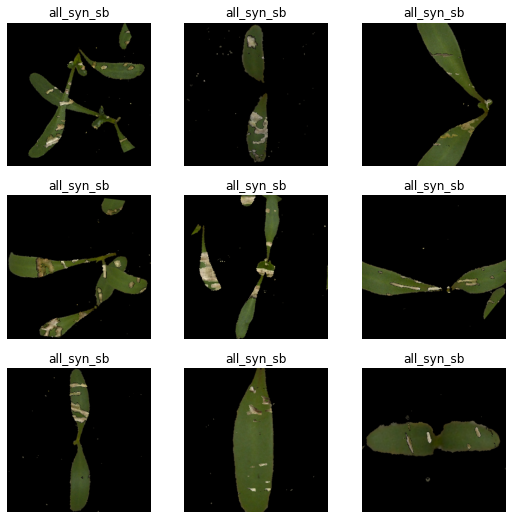

In [25]:
dls.show_batch()

# ResNet 34 Model used all healhy and syn images

In [26]:

learn_res34 = cnn_learner(dls, resnet34, metrics=(error_rate, accuracy))
learn_res34.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.004859,0.005602,0.001702,0.998298,04:44


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.003613,0.000703,0.000252,0.999748,06:08
1,0.008933,0.013841,0.002122,0.997878,06:07
2,0.000000,0.000000,0.000000,1.000000,06:04
3,0.000016,0.000000,0.000000,1.000000,06:16
4,0.005241,0.000000,0.000000,1.000000,06:10


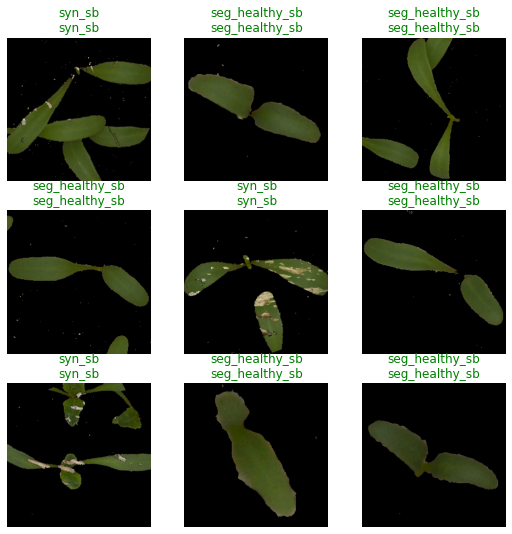

In [36]:
learn_res34.show_results()

# Evaluate Model

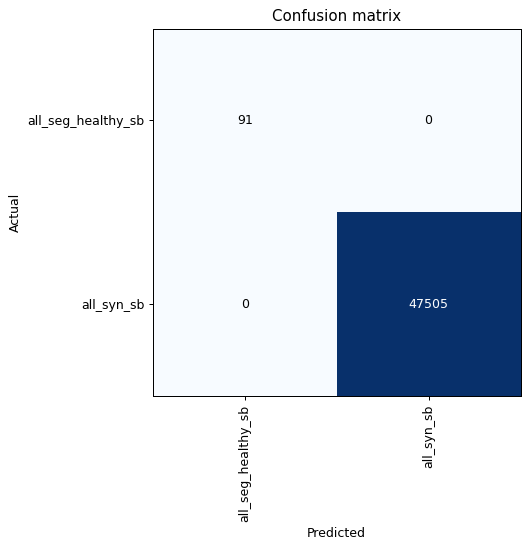

In [27]:

interp_res34 = ClassificationInterpretation.from_learner(learn_res34)
interp_res34.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [41]:
learn_res34.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

# AlexNet Architecture

In [28]:

learn_alex = cnn_learner(dls, alexnet, metrics=(error_rate, accuracy))
learn_alex.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.012479,0.006880,0.001324,0.998676,01:22


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.002303,0.000590,0.000147,0.999853,02:06
1,0.012031,0.001482,0.000525,0.999475,02:04
2,0.000868,0.000034,0.000000,1.000000,02:07
3,0.000915,0.010750,0.000273,0.999727,02:05
4,0.000003,0.006357,0.000189,0.999811,02:04


# Evaluate Model

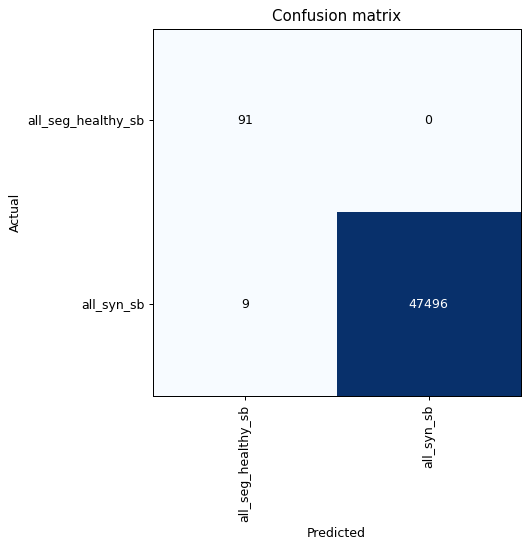

In [29]:

interp_alex = ClassificationInterpretation.from_learner(learn_alex)
interp_alex.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [32]:
learn_alex.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 63 x 63   
Conv2d                                    23296      True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 31 x 31   
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 192 x 31 x 31  
Conv2d                                    307392     True      
ReLU                                                           
____________________________________________________________________________
                     32 x 192 x 15 x 15  
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 384 x

# ResNet 152 Architecture

In [33]:

learn_res152 = cnn_learner(dls, resnet152, metrics=(error_rate, accuracy))
learn_res152.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.001395,0.000671,0.000252,0.999748,25:53


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.008431,0.000136,0.000063,0.999937,34:31
1,0.000390,0.000144,0.000042,0.999958,37:19
2,0.000000,0.000003,0.000000,1.000000,33:29
3,0.000000,0.000049,0.000021,0.999979,33:31
4,0.000000,0.000041,0.000021,0.999979,33:29


# Evaluate Model

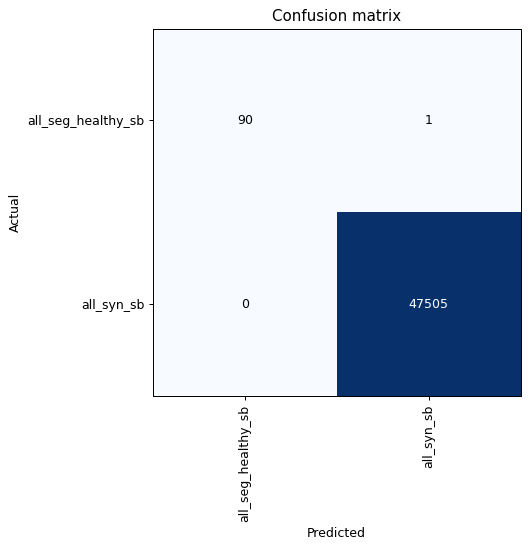

In [34]:

interp_res152 = ClassificationInterpretation.from_learner(learn_res152)
interp_res152.plot_confusion_matrix(dpi = 90,figsize = (6,6))